# Agenda
Data preprocessing is an important stage of data mining. In this exercise, we perform data feature selection as preprocessing task. The exercise selects a few techniques for each category of feature selection and illustrates how to achieve them. The content for the remainder of this guide is as follows.

## Table of Contents
1. [Python Libraries](#libraries)  
    1.1 [Installing Python Libraries](#lib-install)  
    1.2 [Importing Python Libraries](#lib-import)  
2. [Feature Selection](#selection)  
    2.1 [Univariate Selection](#u-selection)  
    2.2 [Multivariate Selection](#m-selection)  
    2.3 [Exercise: Feature Selection using Wrappers](#wrapper)  
    [The End](#end)


# 1. Python Libraries <a name="libraries"></a>
## 1.1 Install Python libraries <a name="lib-install"></a>
This exercise will requires the following **Python** libraries:

<ul>
    <li><strong>numpy:</strong> numerical computations</li>
    <li><strong>pandas:</strong> data manipulation using DataFrames</li>
    <li><strong>scikit learn:</strong> predictive data analysis</li>
    <li><strong>matplotlib:</strong> plotting graphs</li>
    <li><strong>seaborn:</strong> nice graph visualization</li>
</ul>

In [1]:
# Installing Libraries (if not installed)
#!pip3 install matplotlib
#!pip3 install scikit-learn
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install pandas

## 1.2 Import libraries <a name="lib-import"></a>

In [2]:
# Importing Libraries
from sklearn.datasets import load_boston # Loads our sample data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV

# 2. Feature Selection <a name="selection"></a>
This exercise is adopted from [getting data ready for modelling](https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a).

## 2.1 Univariate Feature Selection <a name="u-selection"></a>

In this exercise, we perform the following tasks:

<ol>
    <li>create a dummy data set and load it into a Pandas DataFrame</li>
    <li>select a target variable and feature matrix</li>
    <li>set a variance threshold</li>
    <li>(manually) check every feature against the target by computing variance</li>
</ol>


In [3]:
# Creating dummy data set with the following attributes: 
# size of house (sq. m), number of bedrooms, number of parking slots, montly rent (usd)
data = {'Size': [90, 97, 82, 39, 120],
        'Bedrooms': [2, 2, 3, 1, 4],
        'Parking': [2, 2, 3, 1, 3],
        'Rent': [90, 100, 80, 40, 120]}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Size,Bedrooms,Parking,Rent
0,90,2,2,90
1,97,2,2,100
2,82,3,3,80
3,39,1,1,40
4,120,4,3,120


In [4]:
# Choosing target variable and feature matrix
X = df.drop("Rent",1)   # Feature Matrix
y = df["Rent"]          # Target Variable
X

<ipython-input-4-a8e946e38fae>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("Rent",1)   # Feature Matrix


,Size,Bedrooms,Parking
0,90,2,2
1,97,2,2
2,82,3,3
3,39,1,1
4,120,4,3


In [5]:
# Target Variable: Rent
# Feature Matrix: Size and Bedrooms
# Threshold Variance Value: 5

# comparisons
var1 = df[["Rent", "Size"]].var(axis=1)
var2 = df[["Rent", "Bedrooms"]].var(axis=1)
var3 = df[["Rent", "Parking"]].var(axis=1)
# var4 = df[["Rent", "Rent"]].var(axis=1)



print(var1)
print("-----")
print(var2)
print("-----")
print(var3)
print("-----")
#var2
#var3
#var1.mean()
#var1.mode()
#var2.mode()
#var3.mode()


0    0.0
1    4.5
2    2.0
3    0.5
4    0.0
dtype: float64
-----
0    3872.0
1    4802.0
2    2964.5
3     760.5
4    6728.0
dtype: float64
-----
0    3872.0
1    4802.0
2    2964.5
3     760.5
4    6844.5
dtype: float64
-----


### Discussion

In the example above, we use a dummy data set that has the attributes: {Size, Bedrooms, Parking, Rent}. {Rent} is chosen to the target variable and {Size, Bedrooms, Parking} form the feature matrix. 

In the exercise, each feature in the feature matrix is compared against the target variable to check its importance. Variance is computed for each comparison. The minimum variance threshold used in this example is 5; that is, if the variance of the comparison is less than 5 then the affected samples have almost the same values. This implies that these samples will not generate any meaningful information when applied on a predictive model.

In this example, we see that feature {Size} when compared to the target variable {Rent} yields variance that are less than 5 for all the samples. This feature can be ignored because it will not bring any predictive power to the model.

## 2.2 Multivariate Feature Selection <a name="m-selection"></a>

This exercise has been adopted from [feature selection with pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).

### 1. Load data set
In this section, we perform our the following preprocessing tasks:

<ol>
    <li>load the Boston data set (from sk-learn) into a <strong>Pandas</strong> DataFrame;</li>
    <li>choose the <strong>Target Variable</strong> and the <strong>Feature Matrix</strong>.</li>
</ol>
 

In [6]:
# Loading the dataset
x = load_boston()
df_2 = pd.DataFrame(x.data, columns = x.feature_names)
#df
#df.columns
df_2.tail()
#x.target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
# Choosing target variable and feature matrix
df_2["MEDV"] = x.target   # Add a new column to df
X_2 = df_2.drop("MEDV",1)   # Feature Matrix
y_2 = df_2["MEDV"]          # Target Variable
df_2.head()               # returns first 5 rows of the data set
#df_2.values

<ipython-input-7-26a96003ccf1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_2 = df_2.drop("MEDV",1)   # Feature Matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2. Filter FS method (Pearson correlation)

As the name suggests, you filter and pick only the relevant features (usually a subset of the original features). Filter methods are used a preprocessing step since the methods do not use any machine learning algorithms.

In this exercise, we perform filtering using a Pearson correlation matrix. We compute and plot correlation heatmap and observe the correlation of features with target variable. We only select features whose absolute correlation coefficient values are above 0.5.

The correlation coefficient has values between -1 to 1:

<ul>
    <li>A value closer to 0 implies weaker correlation (exact 0 implying no correlation)</li>
    <li>A value closer to 1 implies stronger positive correlation</li>
    <li>A value closer to -1 implies stronger negative correlation</li>
</ul>



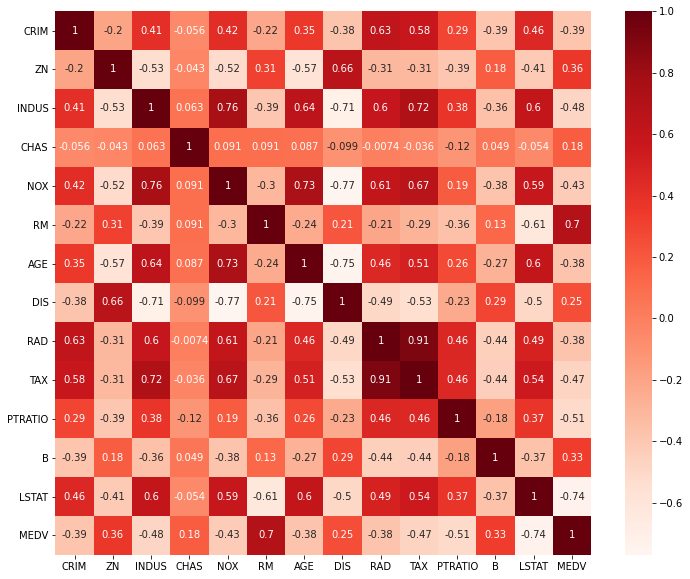

In [8]:
# Using Pearson Correlation of all features (including target)
plt.figure(figsize=(12,10))                      # creating a plot figure
#cor = df.corr()                                 # compute correlation
cor = df_2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)   # plot heatmap
plt.show()                                       # show heatmap

In [9]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#cor_target = abs(cor["Rent"])


#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

### Discussion

We observe that only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV (above 0.5). So we drop the other features apart from these.

### 3. Embedded FS method (Lasso regularization)

Embedded methods are iterative and select features based on importance. In every iteration of the model training process, they select features which contribute most to the training for a particular iteration. Regularization techniques are the most commonly used embedded methods and they penalize a feature given a coefficient threshold.

In this exercise, we use the Lasso regularization technique to select important features. If a feature is irrelevant, Lasso penalizes it’s coefficient (makes it 0). The features whose coefficient = 0 are removed and the others are taken.

In [10]:
X = X_2
y = y_2
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#coef
reg.coef_

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444
Lasso picked 10 variables and eliminated the other 3 variables


array([-0.07426626,  0.04945448, -0.        ,  0.        , -0.        ,
        1.804385  ,  0.01133345, -0.81324404,  0.27228399, -0.01542465,
       -0.74287183,  0.00892587, -0.70365352])

In [11]:
reg.fit(X,y)

LassoCV()

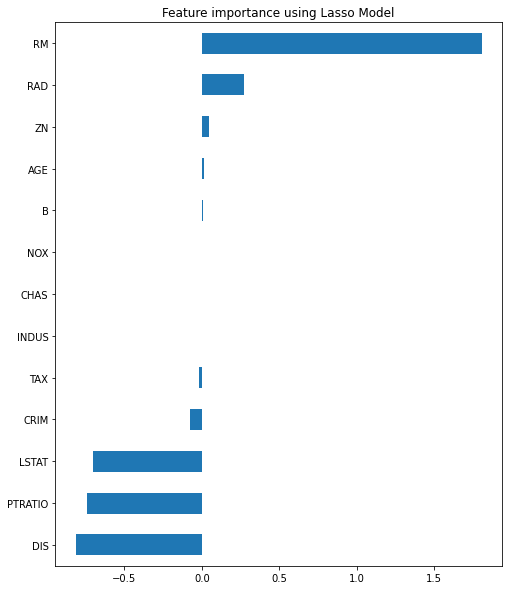

In [12]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

### Discussion

Here Lasso model has taken all the features except NOX, CHAS and INDUS.

## 2.3 Exercise: Feature Selection using Wrappers <a name="wrapper"></a>
Demonstrate how perform feature selection using one or more **Wrapper** techniques.

# The End <a name="end"></a>